In [1]:
pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00


<IPython.core.display.Javascript object>


0: 480x640 6 persons, 1 backpack, 1 bottle, 4 chairs, 1 laptop, 199.0ms
Speed: 4.1ms preprocess, 199.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


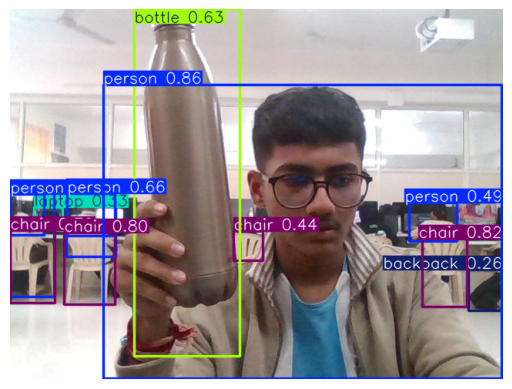

In [11]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import output
from base64 import b64decode
import numpy as np

# Load model
model = YOLO("yolov8n.pt")

# JS code for webcam capture
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize video to fit notebook
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture click
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      takePhoto(%f);
    ''' % quality)
    display(js)
    data = output.eval_js('takePhoto(%f)' % quality)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image from webcam
filename = take_photo()

# Load image
img = cv2.imread(filename)

# Run YOLO
results = model(img)
annotated = results[0].plot()

# Show output
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
